Loading Breast Cancer dataset...
First 5 rows of dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wo

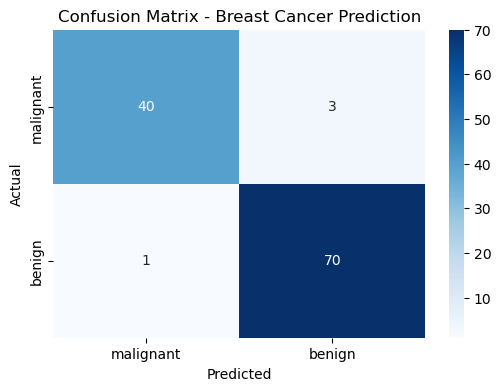

In [2]:
# Disease Prediction using Breast Cancer dataset

# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
print("Loading Breast Cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for analysis
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Step 3: Display dataset information
print("First 5 rows of dataset:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nTarget classes:", data.target_names)

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Build Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict on test set
y_pred = model.predict(X_test)

# Step 8: Evaluate model
print("\nAccuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Breast Cancer Prediction')
plt.show()
